### Model Training

#### Import data and required packages.
Import Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [4]:
!pip install catboost

In [5]:
#Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Import the CSV data into DataFrame.
df = pd.read_csv('data/stud.csv')

In [7]:
#Show top 5 records.
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
#Split into X and y variables.
X = df.drop(columns=['math_score'], axis=1)

In [9]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [10]:
print("Categories in 'gender' variable:     ", end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:    ", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variables:     ", end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:      ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable:    ", end=" ")
print(df['test_preparation_course'].unique())


Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variables:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:       ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:     ['none' 'completed']


In [11]:
y = df['math_score']

In [12]:
# Create transformers for num features and catrgorical features.
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
       ('OneHotEncoder', numeric_transformer, num_features ),
        ('StandardScaler', oh_transformer, cat_features)
    ]
)


In [13]:
X= preprocessor.fit_transform(X)

In [14]:
X.shape

(1000, 19)

In [15]:
#Separate the dataset into train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Evaluate function to give all metrics after model training.

In [16]:
def evaluate_model(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    r2score = r2_score(actual, predicted)
    return mae, rmse, r2score

### Build and Train the models.

In [17]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoosting Regressor" : CatBoostRegressor(verbose=False),
    "AdaBoost Regressor" : AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #Make predictions.
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2score = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2score = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training set")
    print(f"- Mean Absolute Error: {model_train_mae:.4f}")
    print(f"- Root Mean Squared Error: {model_train_rmse:.4f}")
    print(f"- R2 Score: {model_train_r2score:.4f}")

    print("-------------------------------")
    print("Model Performance for Test set")
    print(f"- Mean Squared Error: {model_test_mae:.4f}")
    print(f"- Root Mean Squared Error: {model_test_rmse:.4f}")
    print(f"- R2 score: {model_test_r2score:.4f}")
    r2_list.append(model_test_r2score)

    print("=" * 35)
    print('\n')

    
    
    


Linear Regression
Model Performance for Training set
- Mean Absolute Error: 4.2667
- Root Mean Squared Error: 5.3231
- R2 Score: 0.8743
-------------------------------
Model Performance for Test set
- Mean Squared Error: 4.2148
- Root Mean Squared Error: 5.3940
- R2 score: 0.8804


Lasso
Model Performance for Training set
- Mean Absolute Error: 5.2063
- Root Mean Squared Error: 6.5938
- R2 Score: 0.8071
-------------------------------
Model Performance for Test set
- Mean Squared Error: 5.1579
- Root Mean Squared Error: 6.5197
- R2 score: 0.8253


Ridge
Model Performance for Training set
- Mean Absolute Error: 4.2650
- Root Mean Squared Error: 5.3233
- R2 Score: 0.8743
-------------------------------
Model Performance for Test set
- Mean Squared Error: 4.2111
- Root Mean Squared Error: 5.3904
- R2 score: 0.8806


K-Neighbors Regressor
Model Performance for Training set
- Mean Absolute Error: 4.5180
- Root Mean Squared Error: 5.7134
- R2 Score: 0.8552
-------------------------------
Mod

### Results

pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model_Name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)

### LinearRegression

In [18]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_predicted = lin_model.predict(X_test)
score = r2_score(y_test, y_predicted)*100
print(f'The Accuracy of the model is: {score:.2f}')

The Accuracy of the model is: 88.04


### Plot y_pred and y_test

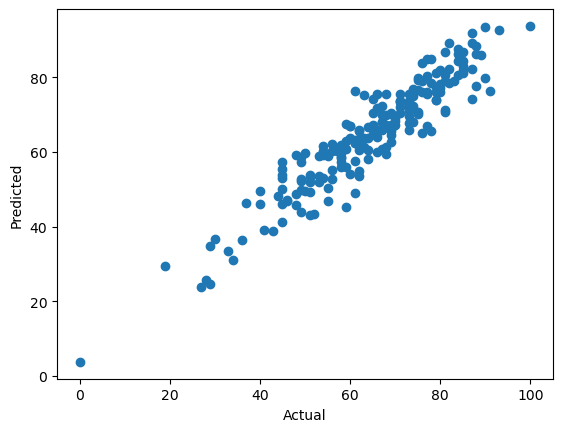

In [19]:
plt.scatter(y_test, y_predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

Text(0, 0.5, 'Predicted')

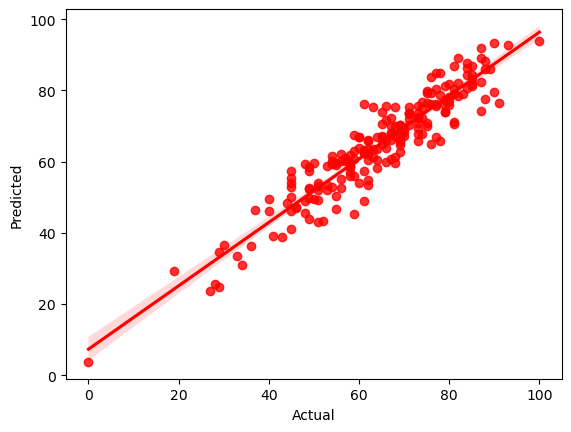

In [20]:
#Plot the scatter plot with bestfit line.
sns.regplot(x=y_test, y=y_predicted, ci=95, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [21]:
### Difference between Actual and Predicted values.
diff_act_pred = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_predicted, 'Difference' : y_test-y_predicted}) 

In [22]:
diff_act_pred

,Actual,Predicted,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
